# **Objetivo del Cuaderno Jupyter**
- Observar la Distribución de los Negoicos, tanto por Estados como por Categorías a fin de tomar decisión de que datos tomar en cuenta para el Modelo.
- Tomar en cuenta que la LIMPIEZA de los datos se realizó en el cuaderno 1_etl_y_filtrado_yelp.ipynb

Importaando Librerías

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

Cargando los Dataframes

In [ ]:
user = pd.read_parquet('datasets/yelp/filtrados/y_user.parquet')
business = pd.read_parquet('datasets/yelp/filtrados/y_business.parquet')
reviews = pd.read_parquet('datasets/yelp/filtrados/y_reviews.parquet')
categorias = pd.read_parquet('datasets/categorias/y_categories_business.parquet')

Revisando cuando estados disponen de Data

In [ ]:
lista_estados = business['state'].unique().tolist()
lista_estados

['PA',
 'TN',
 'MO',
 'FL',
 'IN',
 'NV',
 'IL',
 'AZ',
 'LA',
 'CA',
 'DE',
 'ID',
 'NC',
 'CO',
 'MT',
 'MD',
 'UT',
 'MI',
 'TX']

In [6]:
for estado in lista_estados:
  print(f'Cantidad de Negocios en {estado} --> {business[business["state"] == estado].shape[0]}')

Cantidad de Negocios en PA --> 16020
Cantidad de Negocios en TN --> 5535
Cantidad de Negocios en MO --> 5330
Cantidad de Negocios en FL --> 11468
Cantidad de Negocios en IN --> 5323
Cantidad de Negocios en NV --> 2454
Cantidad de Negocios en IL --> 1209
Cantidad de Negocios en AZ --> 3572
Cantidad de Negocios en LA --> 4949
Cantidad de Negocios en CA --> 1734
Cantidad de Negocios en DE --> 1163
Cantidad de Negocios en ID --> 1777
Cantidad de Negocios en NC --> 3
Cantidad de Negocios en CO --> 1
Cantidad de Negocios en MT --> 1
Cantidad de Negocios en MD --> 1
Cantidad de Negocios en UT --> 1
Cantidad de Negocios en MI --> 1
Cantidad de Negocios en TX --> 1


El objetivo como Equipo que tenemos con respecto al Modelo de Recomendación es quedarnos con TODA la DATA de todos los Estado y que el modelo trabaje en todos ellos.  Ahora No tiene Sentido quedarnos con estados que sólo tienen 1 ó 3 Negocios solamente para Recomendar... Nos quedaremos con TODOS los estados EXCEPTO los 6 estados que en la Impresión anterior se aprecia NO TIENEN SUFICIENTES NEGOCIOS

In [ ]:
estados_a_eliminar = ['NC', 'CO', 'MT', 'MD', 'UT', 'MI', 'TX']
for estado in estados_a_eliminar:
  lista_estados.remove(estado)

# Eliminando los estados que tienen 3 o 1 Negocio solamente
mask = business['state'].isin(lista_estados)
business = business[mask]

Como Quedarian los Negocios, Usuarios y Reseñas distribuidas a lo largo de estos 12 Estados

In [39]:
states = {
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "LA": "Louisiana",
    "MD": "Maryland",
    "MI": "Michigan",
    "MO": "Missouri",
    "NV": "Nevada",
    "PA": "Pennsylvania",
    "TN": "Tennessee",
    "NC": "North Carolina",
    "MT": "Montana",
    "UT": "Utah",
    "TX": "Texas",
 }
data = []
for estado in lista_estados:
  diccionario = {}
  diccionario['Estado'] = states[estado]
  mask = business['state'] == estado
  print(f'En el estado {states[estado]} hay {business.loc[mask].shape[0]} Negocios')
  lista_business = business.loc[mask]['business_id'].unique().tolist()
  diccionario['Negocios'] = len(lista_business)

  mask = reviews['business_id'].isin(lista_business)
  print(f'Hay {reviews.loc[mask].shape[0]} reviews  en el estado {estado}')
  lista_usuarios = reviews.loc[mask]['user_id'].unique().tolist()
  diccionario['Reseñas'] = reviews.loc[mask].shape[0]

  mask = user['user_id'].isin(lista_usuarios)
  print(f'Hay {user.loc[mask].shape[0]} usuarios en el estado {estado}')
  diccionario['Usuarios'] = user.loc[mask].shape[0]
  data.append(diccionario)
  print("*"*70)

En el estado Pennsylvania hay 16020 Negocios
Hay 79165 reviews  en el estado PA
Hay 40434 usuarios en el estado PA
**********************************************************************
En el estado Tennessee hay 5535 Negocios
Hay 51833 reviews  en el estado TN
Hay 28631 usuarios en el estado TN
**********************************************************************
En el estado Missouri hay 5330 Negocios
Hay 32998 reviews  en el estado MO
Hay 16942 usuarios en el estado MO
**********************************************************************
En el estado Florida hay 11468 Negocios
Hay 103629 reviews  en el estado FL
Hay 51352 usuarios en el estado FL
**********************************************************************
En el estado Indiana hay 5323 Negocios
Hay 40198 reviews  en el estado IN
Hay 16540 usuarios en el estado IN
**********************************************************************
En el estado Nevada hay 2454 Negocios
Hay 30853 reviews  en el estado NV
Hay 15718 usuari

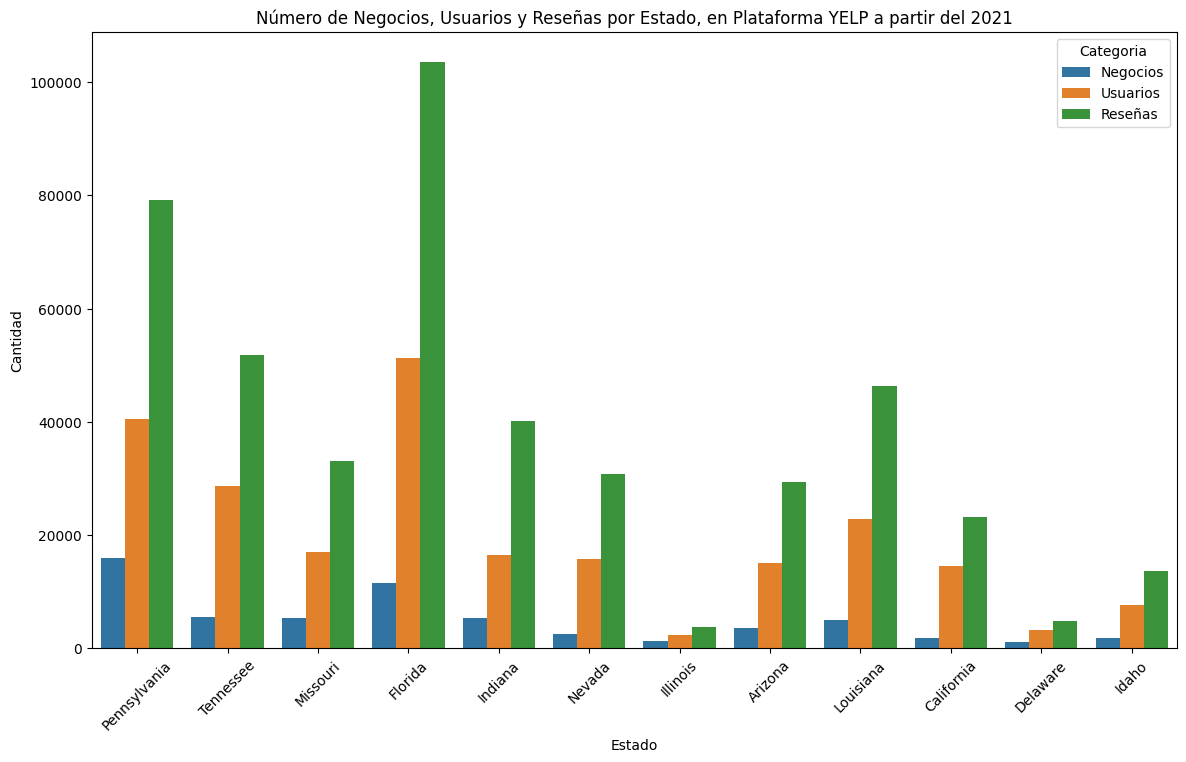

In [ ]:

df_grafico = pd.DataFrame(data)

df_grafico = df_grafico.melt(id_vars='Estado', value_vars=['Negocios', 'Usuarios', 'Reseñas'],
                             var_name='Categoria', value_name='Cantidad')


plt.figure(figsize=(14, 8))  
sns.barplot(data=df_grafico, x='Estado', y='Cantidad', hue='Categoria')


plt.title('Número de Negocios, Usuarios y Reseñas por Estado, en Plataforma YELP a partir del 2021')
plt.xlabel('Estado')
plt.ylabel('Cantidad')

plt.xticks(rotation=45)

plt.show()

## Toca Observar como están distribuidos los números en las Categorías seleccionadas dentro del ramo de restaurantes

In [ ]:
lista_categorias = categorias['category_general'].unique().tolist()

lista_categorias

['RESTAURANTES GENERAL',
 'CAFETERIAS - COMIDAS LIGERAS',
 'BARES - CERVECERIAS - TAPAS',
 'COMIDA RAPIDA',
 'COCINA INTERNACIONAL',
 'JAPONESA - ASIATICA',
 'GRILL - ASADOS - CARNES',
 'MEDITERRANEA',
 'PIZZERIAS',
 'DIETA - VEGANA - ENSALADAS',
 'MEXICANA',
 'ROSQUILLAS',
 'HELADERIAS',
 'BAR DE AMBIENTE']

In [31]:
data = []
for categoria in lista_categorias:
  diccionario = {}
  diccionario['Categoría'] = categoria
  diccionario['Numero de Negocios'] = categorias[categorias['category_general'] == categoria]['business_id'].nunique()
  data.append(diccionario)

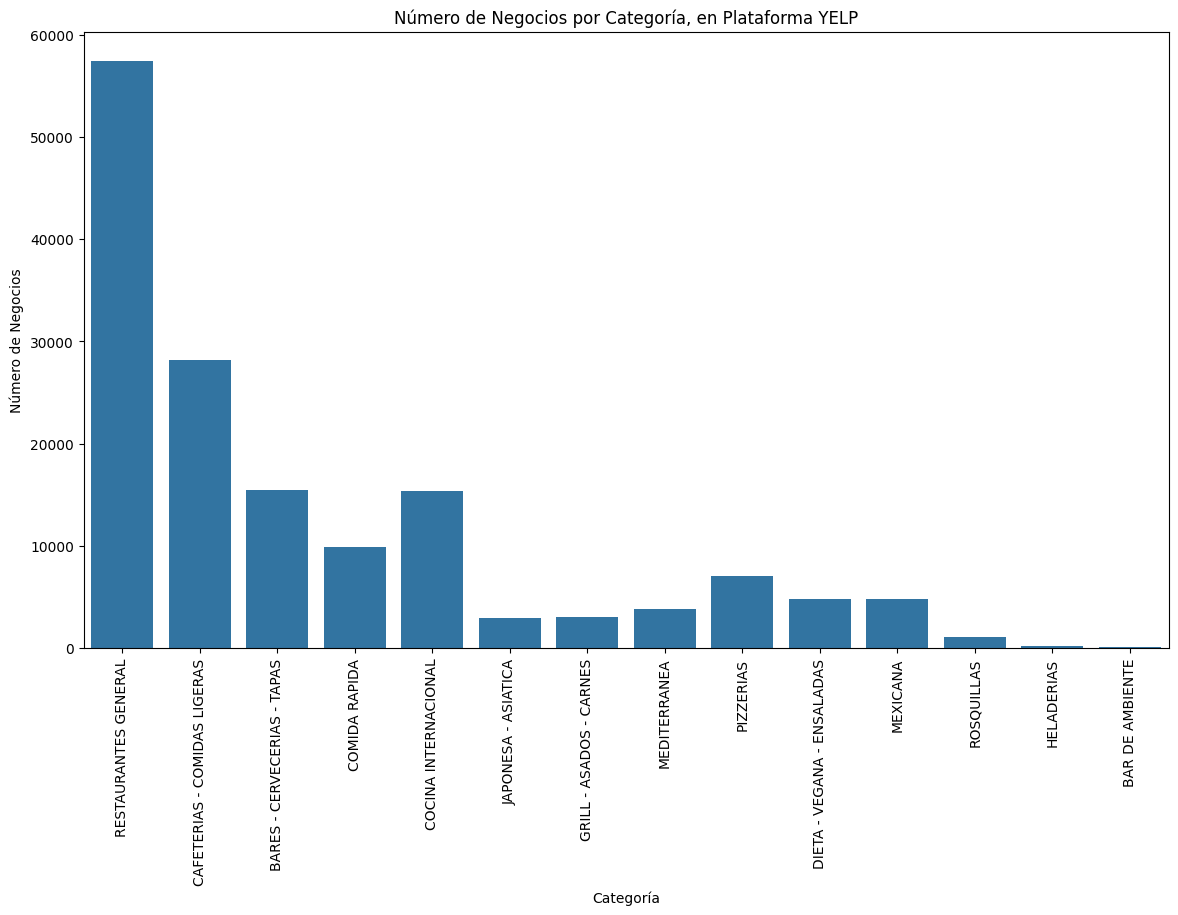

In [3]:
df_grafico = pd.DataFrame(data)

plt.figure(figsize=(14, 8)) 
sns.barplot(data=df_grafico, x='Categoría', y='Numero de Negocios')

plt.title('Número de Negocios por Categoría, en Plataforma YELP')
plt.xlabel('Categoría')
plt.ylabel('Número de Negocios')

plt.xticks(rotation=90)

plt.show()

Los Negocios pueden pertenecer a mas de 1 categoria... Por eso se observa que casi Todos los Negocios pertenecen a la Categoria Restaurantes General. Por otro lado se observa que las categorías `Bar de Ambiente`, `Heladerias` y `Rosquillas` tienen muy pocos negocios... Enfocaremos nuestro modelo de Recomendación a todas las Categorías excepto estas tres